# How to load the data
---

This kernel shows you how to resize these images and load them into an array ready to feed your models. The dataset contains 14 different disease classes, but this kernel separates the data based on which x-rays show Lung Infiltrations and which x-rays do not. This makes the data suitable for a binary classification and you can modify this kernel to classifiy any of the other disease classes. 

[Click here](https://www.kaggle.com/crawford/keras-cnn-using-kernel-output-as-a-data-source) to see the second kernel, where I use the output from this kernel to train a convolutional neural network.

In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare file directories and image paths and load labels

---

In [2]:
# ../input/
PATH = os.path.abspath(os.path.join('..', 'input'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "sample", "images")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv('../input/sample_labels.csv')

In [3]:
# First five images paths
images[0:5]

['/kaggle/input/sample/images/00028357_037.png',
 '/kaggle/input/sample/images/00008211_000.png',
 '/kaggle/input/sample/images/00020725_001.png',
 '/kaggle/input/sample/images/00019089_002.png',
 '/kaggle/input/sample/images/00014201_004.png']

# Show three random images

---

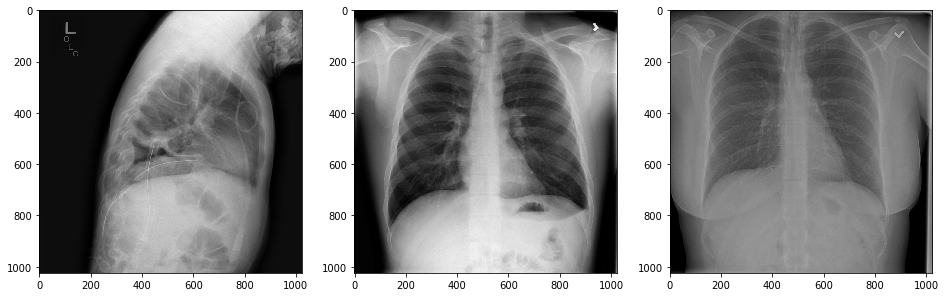

In [4]:
r = random.sample(images, 3)
r

# Matplotlib black magic
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]));    

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5541,00030209_008.png,Infiltration,8,30209,010Y,M,AP,3056,2544,0.139,0.139


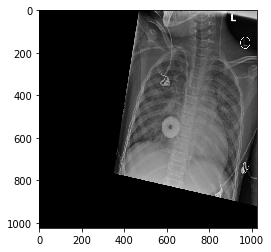

In [5]:
# Example of bad x-ray and good reason to use data augmentation
e = cv2.imread(os.path.join(SOURCE_IMAGES,'00030209_008.png'))

plt.imshow(e)

labels[labels["Image Index"] == '00030209_008.png']

# Turn images into arrays and make a list of classes
---

Images with Lung Infiltrations will be labeled "Infiltration" and everything else goes into "Not Infiltration". In this process I am creating two arrays, one for the images and one for the labels. I am also resizing the images from 1024x1024 to 128x128.

In [6]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    disease="Infiltration"

    x = [] # images as arrays
    y = [] # labels Infiltration or Not_infiltration
    WIDTH = 128
    HEIGHT = 128

    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if disease in finding:
            #finding = str(disease)
            finding = 1
            y.append(finding)

        else:
            #finding = "Not_" + str(disease)
            finding = 0
            y.append(finding)

    return x,y

In [7]:
x,y = proc_images()

In [8]:
# Set it up as a dataframe if you like
df = pd.DataFrame()
df["labels"]=y
df["images"]=x

In [9]:
print(len(df), df.images[0].shape)

5606 (128, 128, 3)


# Saving arrays for use in another kernel
----

Since this kernel takes up valuable time modifying the data to feed into a predictive model, it makes sense to save the arrays so that we don't have to process them again. We can use the output from this kernal as a data source for another kernel where we  can train a model. 

In [10]:
np.savez("x_images_arrays", x)
np.savez("y_infiltration_labels", y)

In [11]:
!ls -1

__output__.json
__results__.html
__temp_notebook_source__.ipynb
custom.css
x_images_arrays.npz
y_infiltration_labels.npz


### Click here to see how I use the output from this kernel as input for a CNN with Keras:<br>
[https://www.kaggle.com/crawford/keras-cnn-using-kernel-output-as-a-data-source](https://www.kaggle.com/crawford/keras-cnn-using-kernel-output-as-a-data-source)